# Optimisation: CMA-ES

This example shows you how to run a global optimisation with [CMA-ES](http://pints.readthedocs.io/en/latest/optimisers/cmaes.html).

For a more elaborate example of an optimisation, see: [basic optimisation example](./first-example.ipynb).

Minimising error measure
using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      6606977    0:03.6
1     12     4760926    0:03.6
2     18     1238427    0:03.6
3     24     1238427    0:03.6
20    126    1228394    0:03.7
40    246    1228329    0:03.7
60    366    1127863    0:03.8
80    486    95629.7    0:03.9
100   606    94398.95   0:03.9
120   726    94398.88   0:04.0
140   846    94398.88   0:04.1
160   966    94398.88   0:04.1
180   1086   94398.88   0:04.2
200   1206   94398.88   0:04.2
220   1326   94398.88   0:04.3
240   1446   94398.88   0:04.4
260   1566   94398.88   0:04.4
280   1686   94398.88   0:04.5
300   1806   94398.88   0:04.5
320   1926   94398.88   0:04.6
340   2046   94398.88   0:04.7
360   2166   94398.88   0:04.9
370   2220   94398.88   0:04.9
Halting: No significant change for 200 iterations.
Score at true solution: 
94519.5264238
Found solution:          True p

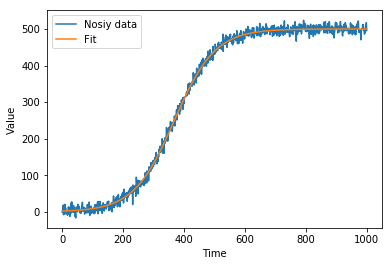

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.01, 450
sigma0 = [0.01, 100]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    sigma0,
    boundaries,
    method=pints.CMAES
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()